<a href="https://colab.research.google.com/github/raj-vijay/rp/blob/main/BioNLP_AI_based_Mono_Multimodel_Learning_Approaches_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Artificial Intelligence-based mono and multi-modal systems for medical language video understanding for question & answering (QA) applications in Healthcare</h1>

<b>Abstract</b>

<p align='justify'>
Multimodal systems are gaining increasing prominence when it comes to the domain of artificial intelligence, and healthcare is no exception. The multimodal systems in the domain of artificial intelligence explore and makes possible the communication between visual reality and natural language understanding. Healthcare practice, education and procedures are often complicated, and the knowledge embedded in this domain is expressed in the form of multimodal representation. Expert healthcare knowledge is expressed as advanced academic, research and practitioner literature, and is often supplemented, supported and enabled by procedures and practices that are better expressed in visual representations. This project explores the possibility and potential of developing sophisticated artificial intelligence-based for medical practitioners and individuals involved in the healthcare domain by leveraging the MedVidCL and MedVidQA datasets to accomplish the tasks of Medical Video Classification (MVC) and Medical Visual Answer Localization (MVAL). The medical video classification and medical visual answer localization tasks work in unison to facilitate cross-modal (medical language and medical video) understanding and help medical practitioners contextualize important medical knowledge by bringing together both natural language understanding and its expression in the form of visual reality and representation.</p>


**Note:** This artificial intelligence workload is run on Google Cloud Platform (GCP) compute environment with Tesla T4 GPUs.

## Medical Instructional Video Classification and Question Answering

**Medical Video Classification (MVC)**

<p align = 'justify'>Given an input video, the task is to categorize the video into one of the following classes:

* <p align = 'justify'>Medical Instructional: An instructional medical video for non-professionals should clearly demonstrate a medical procedure providing enough details to reproduce the procedure and achieve the desired results without prior training. The accompanying narrative should be to the point and should clearly describe the steps in the visual content. Suppose a valid medical or health-related question is aligned with an instructional medical video. In that case, it should explain/answer the medical question with a demonstration or should be a tutorial/educational video where someone (e.g., a doctor or a medical professional) demonstrates a procedure related to the medical question or should be a how-to video about the medical or health-related question.</p>

* <p align = 'justify'>Medical Non-instructional: A medical video on a discussion of medical-related topics without any visual answer to any medical or health-related question.</p>

* Non-medical: A video can be categorized as non-medical if the video is neither medical instructional nor medical non-instructional.</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Clean slate
!rm -r /content/sample_data

In [ ]:
from IPython.display import IFrame
IFrame(src='https://medvidqa.github.io/', width=1200, height=900)

###1. Environment Set-up

<p align = 'justify'>The implementation is carried out using Google Colaboratary on the Google Cloud Compute Platform. A 1 x NVIDIA Tesla T4 GPU-based high memory Intel Haswell compute virtual machine is an instance to run the project.</p> 

<p align = 'justify'>The Google Colab environment is integrated with the Google Cloud Compute Platform for performing all tasks such as data ingestion, data integration, data exploration, modelling, training and evaluation and performing the predictions for the medical instructional video classification and question answering tasks.</p> 

<p align = 'justify'>The environment is further set up with the miniconda as an efficient way to manage the packages related to python as the entire project is executed using python, and the respective libraries are used for executing artificial intelligence-based models for running natural language processing models.</p>

<p align = 'justify'>The base dataset from BioNLP 2022 tasks as a part of the data description paper for MedVidQACL is extracted from the open-source foundation data repository using OSF clients to enable cloud-native data integration. The baseline models are also extracted from the MedVidQACL GitHub repository and are set up to execute the tasks.</p>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri May 13 22:22:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 2. Integrate MedVidQACL Repository

In [ ]:
import os
import os.path

if os.path.isdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL'):
    print("Directory Exists!")
else:
    os.system('wget https://github.com/deepaknlp/MedVidQACL/archive/refs/heads/master.zip')

Directory Exists!


In [ ]:
if os.path.isdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL'):
    print("Directory Exists!")
else:
    os.system('unzip /content/master.zip')

Directory Exists!


In [ ]:
if os.path.isdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL'):
    print("Directory Exists!")
else:
    os.system('mv /content/MedVidQACL-master/MedVidCL /content/drive/MyDrive/000.Data/MedVidQACL')
    os.system('mv /content/MedVidQACL-master/MedVidQA /content/drive/MyDrive/000.Data/MedVidQACL')
    os.system('rm -r /content/MedVidQACL-master')
    os.system('rm /content/master.zip')

Directory Exists!


###3. Data Preparation for MedVidQACL

Download the MedVidCL dataset from [OSF repository](https://doi.org/10.17605/OSF.IO/PC594) and place train.json/val.json/test.json in the MedVidCL directory

In [ ]:
!pip install osfclient

In [ ]:
if os.path.isfile('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/test.json'):
    print("File Exists!")
elif os.path.isfile('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/train.json'):
    print("File Exists!")
elif os.path.isfile('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/val.json'):
    print("File Exists!")
else:
    os.system('osf -p pc594 clone')
    os.system('mv /content/pc594/osfstorage/MedVidCL/test.json /content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL')
    os.system('mv /content/pc594/osfstorage/MedVidCL/train.json /content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL')
    os.system('mv /content/pc594/osfstorage/MedVidCL/val.json /content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL')
    os.system('rm -r /content/pc594')

File Exists!


In [ ]:
if os.path.isdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/'):
    print("Folder Exists!")
else:
  os.mkdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/')

Folder Exists!


In [ ]:
if os.path.isdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/features/'):
    print("Folder Exists!")
else: 
  os.mkdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/features/')

Folder Exists!


Download the video features from [here](https://bionlp.nlm.nih.gov/VideoFeatures.zip), unzip the file, and place the contents of MedVidCL/I3D in data/features/I3D and the contents of MedVidCL/ViT in data/features/ViT

In [ ]:
if os.path.isdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/features/I3D'):
    print("Directory Exists!")
elif os.path.isdir('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/features/ViT'):
    print("Directory Exists!")
else:
    os.system('wget https://bionlp.nlm.nih.gov/VideoFeatures.zip')
    os.system('unzip /content/VideoFeatures.zip')
    os.system('rm /content/VideoFeatures.zip')
    os.system('mv /content/VideoFeatures/MedVidCL/I3D /content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/features/')
    os.system('mv /content/VideoFeatures/MedVidCL/ViT /content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/features/')
    os.system('rm -r /content/VideoFeatures')

Directory Exists!


To extract the subtitles (i.e., text) of each YouTube video run the following command

In [ ]:
%cd /content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/prepare

/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/prepare


In [ ]:
if os.path.isfile('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/text/test.json'):
    print("File Exists!")
elif os.path.isfile('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/text/train.json'):
    print("File Exists!")
elif os.path.isfile('/content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/text/val.json'):
    print("File Exists!")
else:
    os.system('python /content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/prepare/Text_Extraction.py --target_dir /content/drive/MyDrive/000.Data/MedVidQACL/MedVidCL/data/text/')

File Exists!


**Important Note:** Since Google Cloud Platform (A commercial use environment) does not support native integration with Google Drive (A personal use product), there is a manual intevention required at this step to port the content generated so far to be imported on the Google Cloud Platform. The step will be automated later, and has been skipped due to timeline considerations for now.

In [ ]:
#Baseline Implementations (Outputs generated in a different notebook executed on a different GCP VM)
!python /content/BaseLine_SVM_Text_Model_Reports.py
!python /content/BaseLine_Transformer_Text_Model_Reports.py
!python /content/BaseLine_MultiModal_Model_Reports.py

###4. Data Integration & Exploration

In [ ]:
!pip install ktrain

In [ ]:
import numpy as np

In [ ]:
import json

In [ ]:
vid_train_file = open('/content/train.json')
vid_train = json.load(vid_train_file)

vid_val_file = open('/content/val.json')
vid_val = json.load(vid_val_file)

vid_test_file = open('/content/test.json')
vid_test = json.load(vid_test_file)


In [ ]:
for r in vid_train:
  l = len(r['video_sub_title'])
  r['text'] = r['video_title'] +" "+ r['video_sub_title'][round(l/4):l]

In [ ]:
for r in vid_val:
  l = len(r['video_sub_title'])
  r['text'] = r['video_title'] +" "+ r['video_sub_title'][round(l/4):l]

In [ ]:
for r in vid_test:
  l = len(r['video_sub_title'])
  r['text'] = r['video_title'] +" "+ r['video_sub_title'][round(l/4):l]

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.json_normalize(vid_train)
val_data = pd.json_normalize(vid_val)
test_data = pd.json_normalize(vid_test)

In [ ]:
print(train_data)

         video_id  ...                                               text
0     dnzpr6Yj29I  ...  Cat Scratch Disease is would you do well there...
1     nFc3ppL5faU  ...  How to Increase Estrogen tant to stay healthy ...
2     KmpHXlAR_R4  ...  How to reduce Elevated Creatinine Levels in bl...
3     7tsT8iFcBqE  ...  7 Ways to Detox and Cleanse Your Liver Natural...
4     rMFDVLJKzCQ  ...  Installing The Invisible Shield  worked on a l...
...           ...  ...                                                ...
4212  -9lL22o4DZg  ...  How Do You Treat a Choking Adult? New 2020 AHA...
4213  5KNWWUX38W0  ...        Ken The Living Doll | My Strange Addiction 
4214  cS4Nz6FuEjw  ...                   Upper GI Bleed Causes- Overview 
4215  M34-NDKrik0  ...      Is it dangerous to run on a stress fracture? 
4216  mv94XXKfGN4  ...                   EVA FOAM: Cutting for Beginners 

[4217 rows x 6 columns]


In [ ]:
train_data.head(15)

,video_id,video_link,video_title,video_sub_title,label,text
0,dnzpr6Yj29I,https://www.youtube.com/watch?v=dnzpr6Yj29I,Cat Scratch Disease,cat scratch disease is the topic and essential...,Medical Non-instructional,Cat Scratch Disease is would you do well there...
1,nFc3ppL5faU,https://www.youtube.com/watch?v=nFc3ppL5faU,How to Increase Estrogen,low estrogen levels can affect your health and...,Medical Non-instructional,How to Increase Estrogen tant to stay healthy ...
2,KmpHXlAR_R4,https://www.youtube.com/watch?v=KmpHXlAR_R4,How to reduce Elevated Creatinine Levels in bl...,,Medical Non-instructional,How to reduce Elevated Creatinine Levels in bl...
3,7tsT8iFcBqE,https://www.youtube.com/watch?v=7tsT8iFcBqE,7 Ways to Detox and Cleanse Your Liver Naturally,what's up guys in this video we are going to d...,Medical Non-instructional,7 Ways to Detox and Cleanse Your Liver Natural...
4,rMFDVLJKzCQ,https://www.youtube.com/watch?v=rMFDVLJKzCQ,Installing The Invisible Shield,Gary some iphone in canada CA yeah it's guy in...,Non-medical,Installing The Invisible Shield worked on a l...
5,Notdcs17xbw,https://www.youtube.com/watch?v=Notdcs17xbw,How To Pinstripe A Motorcycle Tank Learnautobo...,all right let's tony from learnautobodyandpain...,Non-medical,How To Pinstripe A Motorcycle Tank Learnautobo...
6,KfUMx7QMvOY,https://www.youtube.com/watch?v=KfUMx7QMvOY,How to Know If Your Tooth Pain Is an Emergency,"Hey everyone, Dr. Sako here. So I'm spending a...",Medical Non-instructional,How to Know If Your Tooth Pain Is an Emergency...
7,P1NFySnTWpw,https://www.youtube.com/watch?v=P1NFySnTWpw,Colon Cancer Metastases,if your doctor has told you you have stage 4 c...,Medical Non-instructional,Colon Cancer Metastases sometimes be curative...
8,xVV-YyXJEX4,https://www.youtube.com/watch?v=xVV-YyXJEX4,Quick and Easy A/C Air Conditioner freon refri...,hello YouTube today we're going to talk about ...,Non-medical,Quick and Easy A/C Air Conditioner freon refri...
9,R6DMwt2F-RM,https://www.youtube.com/watch?v=R6DMwt2F-RM,Hemifacial Spasm - Mayo Clinic,hello my name is dr. Michael link I'm a neuros...,Medical Non-instructional,Hemifacial Spasm - Mayo Clinic s more progress...


In [ ]:
train_data.describe()

,video_id,video_link,video_title,video_sub_title,label,text
count,4217,4217,4217,4217,4217,4217
unique,4217,4217,4203,1267,3,4211
top,o20kWVXbirw,https://www.youtube.com/watch?v=c8e-vmZBWy8,How to make fairy dust,,Medical Non-instructional,How to make fairy dust
freq,1,1,4,2950,2394,4


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


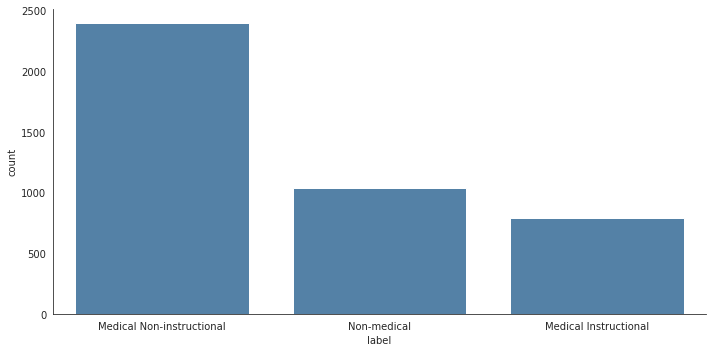

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot('label', data=train_data, aspect=2, kind="count", color='steelblue')    

Medical Instructional
How To Use Ear Drops:  Techniques, Tips, and Recommendations uy called the tragus that forces the liquid all the way down that your canal in the perfect world we almost always want to maintain that side position for a few minutes to let the drops do their work eventually you can get up and if you need to do the other side you repeat if you don't wiggle the ear or pump the tragus the drops don't get in nearly as well if you're putting in the drops of wiggling of the ear and pumping the tragus and the drops aren't going in it might be because there's a bunch of wax or the skins peeling off or the infections filling the ear with goo if that's the case then you might need to see an ear nose and throat doctor to get the ear cleaned out or suction so that the medicine can even get in most of the time ear drops shouldn't hurt but if the ears a little bit inflamed or if there's a scratch or scrape or if there's an ear tube and the drops can get in further is sometimes can

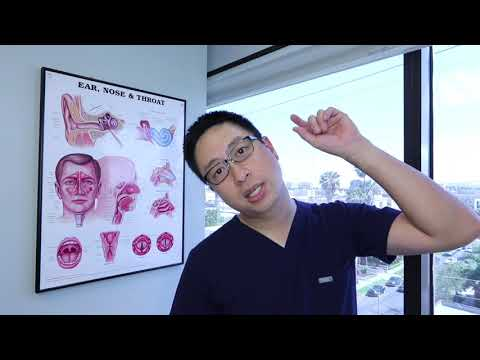

In [ ]:
print(train_data['label'][11])
print(train_data['text'][11])
from IPython.display import YouTubeVideo
YouTubeVideo(train_data['video_id'][11])

Medical Non-instructional
How to Know If Your Tooth Pain Is an Emergency s into play, if you feel sensitive across all of your teeth let's say when you have a sip of cold water or you eat something hot and it's across multiple teeth, this might not be an emergency and this might be something that's related to clenching or grinding your teeth. We're gonna get to that in a few minutes. Now if you feel sensitivity on one tooth and you've never felt it before, this might be an indication that you have a small cavity that's forming or one that's getting bigger. Call the dentist, talk to them, and see if this is something that needs to be addressed. Now let's talk about pain. Let's say you bit into something and you hurt your tooth. Maybe it's throbbing for a few hours, maybe it's bothering you for a day or two. Give it a little bit of time and see if it passes. You might've just bruised your tooth. If the pain doesn't go away or let's say you chipped or broke the tooth or maybe a filling ca

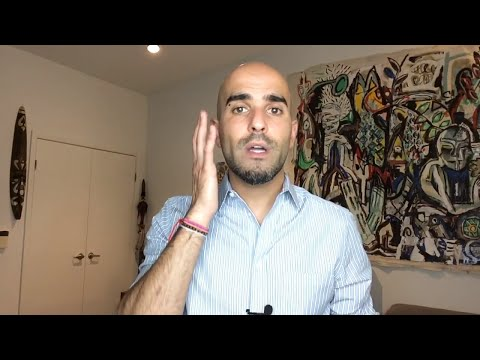

In [ ]:
print(train_data['label'][6])
print(train_data['text'][6])
from IPython.display import YouTubeVideo
YouTubeVideo(train_data['video_id'][6])

Non-medical
Installing The Invisible Shield  worked on a laptop with this supply cleaning product I guess it mobile I'll probably right it's it's actually a mild soap and water solution we're going to spray this on the laptop but before we do that we should get some sort of cloth to clean up your dirty laptop here oh I can see like food stains or something John okay go get a clock right now we're just giving the macbook a little cleaning you fully apply the invisible shield generate from our friends at zagg.com buddy's photo invisible shield calm invisible shield vodka we just want to get rid of any fingerprints make sure you know the install is going to go well nice laptop John okay now that the laptop is all going to be clean the next tip is to figure out where all the pieces go but I assume this piece goes right there is it hard to take apart it's fairly simple they they get some pretty simple instructions what you should do many people don't do this is a one-page instruction sheet 

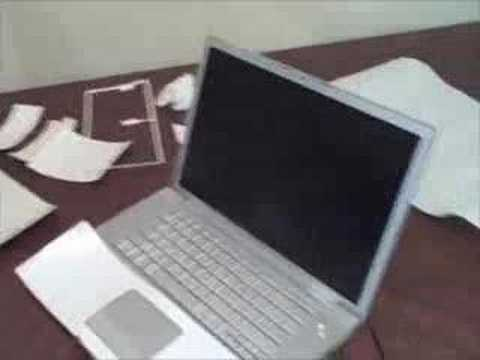

In [ ]:
print(train_data['label'][4])
print(train_data['text'][4])
from IPython.display import YouTubeVideo
YouTubeVideo(train_data['video_id'][4])

In [ ]:
print(test_data)

         video_id  ...                                               text
0     XZtA2d5yEuk  ...  How to manage heartburn & chest heaviness? - D...
1     EVeIqOk5wH4  ...   How To Lower Estrogen Levels In Males Naturally 
2     XY5SAL49Dic  ...                           How to Treat Cellulitis 
3     DtfYDg2rfXg  ...  How to Prevent Elbow Injuries in Youth Basebal...
4     RtcND5dcQE4  ...                   DIY Off The Shoulder Sweatshirt 
...           ...  ...                                                ...
1595  HBhO_t5oFDc  ...  Taping to Prevent Shoulder Dislocation during ...
1596  iyEj7MtkLuM  ...  Mares X Vision Liquid Skin Mask - www.simplysc...
1597  esApSCFFwJ0  ...  How to relieve sinus pressure and sinus pain w...
1598  s238ZpcDCuo  ...  Nadege & Paola Make Arugula Salad with grilled...
1599  pu-uVxo1jxU  ...  How to Treat Gout Flares during the COVID-19 C...

[1600 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


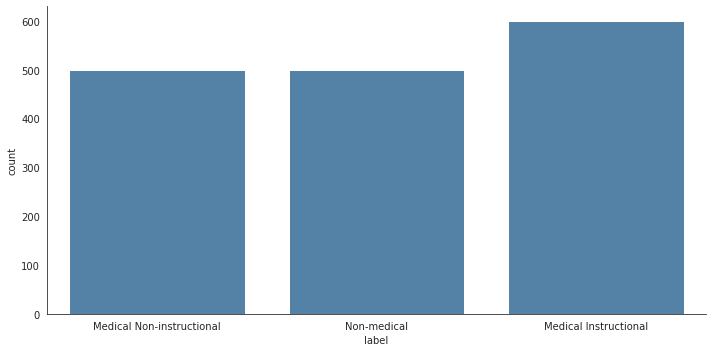

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot('label', data=test_data, aspect=2, kind="count", color='steelblue')    

In [ ]:
test_data.head(15)

,video_id,video_link,video_title,video_sub_title,label,text
0,XZtA2d5yEuk,https://www.youtube.com/watch?v=XZtA2d5yEuk,How to manage heartburn & chest heaviness? - D...,,Medical Non-instructional,How to manage heartburn & chest heaviness? - D...
1,EVeIqOk5wH4,https://www.youtube.com/watch?v=EVeIqOk5wH4,How To Lower Estrogen Levels In Males Naturally,,Medical Non-instructional,How To Lower Estrogen Levels In Males Naturally
2,XY5SAL49Dic,https://www.youtube.com/watch?v=XY5SAL49Dic,How to Treat Cellulitis,,Medical Non-instructional,How to Treat Cellulitis
3,DtfYDg2rfXg,https://www.youtube.com/watch?v=DtfYDg2rfXg,How to Prevent Elbow Injuries in Youth Basebal...,,Medical Non-instructional,How to Prevent Elbow Injuries in Youth Basebal...
4,RtcND5dcQE4,https://www.youtube.com/watch?v=RtcND5dcQE4,DIY Off The Shoulder Sweatshirt,,Non-medical,DIY Off The Shoulder Sweatshirt
5,6SmLo1Td5zY,https://www.youtube.com/watch?v=6SmLo1Td5zY,How to Heal a Rotator Cuff at Home,,Medical Instructional,How to Heal a Rotator Cuff at Home
6,2K2laviq7ag,https://www.youtube.com/watch?v=2K2laviq7ag,Aqua & Metallic Gold Cut Crease using Glamour ...,,Non-medical,Aqua & Metallic Gold Cut Crease using Glamour ...
7,hPxm5m3lHbg,https://www.youtube.com/watch?v=hPxm5m3lHbg,How to: Blu Tack as Ear Plugs | Ear Cleaning C...,,Medical Instructional,How to: Blu Tack as Ear Plugs | Ear Cleaning C...
8,fkYImyopedo,https://www.youtube.com/watch?v=fkYImyopedo,How to apply a compression dressing,,Medical Instructional,How to apply a compression dressing
9,gS8GzCQVGH8,https://www.youtube.com/watch?v=gS8GzCQVGH8,First Aid for Minor Injuries : How to Treat a ...,"You know, at some point in time, all of us are...",Medical Instructional,First Aid for Minor Injuries : How to Treat a ...


In [ ]:
l_max = 128 # Max Length
batch = 6 # Batch size
lr = 2e-5 # Learning Rate
epochs = 30 # Epochs

###5. Language Model

In [ ]:
import ktrain

####5.1 distilroberta-base Transformer Model

In [ ]:
#!rm -r /content/distilroberta-base

In [ ]:
# Transformer Model
language_model='distilroberta-base'

In [ ]:
from ktrain import text
transform_model = text.Transformer(language_model, maxlen=l_max, classes = [0,1])

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:490: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  "The class_names argument is replacing the classes argument. Please update your code."


In [ ]:
# Converting split data to list [so it can processed]
#train
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

In [ ]:
#test
X_test = val_data['text'].tolist()
y_test = val_data['label'].tolist()

In [ ]:
# Pre-processing training & test data
train = transform_model.preprocess_train(X_train,y_train)
test = transform_model.preprocess_train(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 239
	95percentile : 1319
	99percentile : 2152


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:738: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 100
	95percentile : 676
	99percentile : 1304


Is Multi-Label? False


In [ ]:
# Model Classifier
model = transform_model.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch)

In [ ]:
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
            val_targ = np.argmax(val_targ, -1)

        _val_f1 = f1_score(val_targ, val_predict, average='macro')
        _val_recall = recall_score(val_targ, val_predict, average='macro')
        _val_precision = precision_score(val_targ, val_predict, average='macro')

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

In [ ]:
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./distilroberta-base', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
learner.fit_onecycle(lr=lr,epochs=30, callbacks=[tbCallBack])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/30
703/703 [==============================] - 84s 107ms/step - loss: 0.6509 - accuracy: 0.7311 - val_loss: 0.5422 - val_accuracy: 0.7633
Epoch 2/30
703/703 [==============================] - 74s 105ms/step - loss: 0.3780 - accuracy: 0.8625 - val_loss: 0.4943 - val_accuracy: 0.7800
Epoch 3/30
703/703 [==============================] - 74s 105ms/step - loss: 0.3314 - accuracy: 0.8772 - val_loss: 0.4797 - val_accuracy: 0.8033
Epoch 4/30
703/703 [==============================] - 74s 105ms/step - loss: 0.2847 - accuracy: 0.8983 - val_loss: 0.4611 - val_accuracy: 0.8233
Epoch 5/30
703/703 [==============================] - 74s 105ms/step - loss: 0.2493 - accuracy: 0.9123 - val_loss: 0.5199 - val_accuracy: 0.8267
Epoch 6/30
703/703 [==============================] - 74s 105ms/step - loss: 0.2018 - accuracy: 0.9286 - val_loss: 0.4452 - val_accuracy: 0.8400
Epoch 7/30
703/703 [==============================] - 74s 105ms/ste

In [ ]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

In [ ]:
!tensorboard dev upload --logdir ./distilroberta-base \
  --name "MedVidCL - /distilroberta-base" \
  --description "Training results from distilroberta-base on MedVidCL" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/t5aWpYpGTd6JVBi6URUnrg/

[2022-05-11T16:09:18] Started scanning logdir.
[2022-05-11T16:09:19] Total uploaded: 180 scalars, 0 tensors, 1 binary objects (1.5 MB)
[2022-05-11T16:09:19] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/t5aWpYpGTd6JVBi6URUnrg/


In [ ]:
predictor = ktrain.get_predictor(learner.model, transform_model)

In [ ]:
test_data  = pd.json_normalize(vid_test)

In [ ]:
test_data['text']

0       How to manage heartburn & chest heaviness? - D...
1        How To Lower Estrogen Levels In Males Naturally 
2                                How to Treat Cellulitis 
3       How to Prevent Elbow Injuries in Youth Basebal...
4                        DIY Off The Shoulder Sweatshirt 
                              ...                        
1595    Taping to Prevent Shoulder Dislocation during ...
1596    Mares X Vision Liquid Skin Mask - www.simplysc...
1597    How to relieve sinus pressure and sinus pain w...
1598    Nadege & Paola Make Arugula Salad with grilled...
1599    How to Treat Gout Flares during the COVID-19 C...
Name: text, Length: 1600, dtype: object

In [ ]:
y_predict = predictor.predict(np.asarray(test_data['text']))

In [ ]:
print(y_predict)

['Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Non-medical', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 

In [ ]:
answer  = []
for i in range(len(test_data)):
  new = {"video_id":vid_test[i]["video_id"] , "label":y_predict[i]}
  answer.append(new)

In [ ]:
with open("predictions.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_val = predictor.predict(np.asarray(val_data['text']))

In [ ]:
print(len(val_data), len(y_predict))

300 1600


In [ ]:
answer  = []
for i in range(len(val_data)):
  new = {"video_id":vid_val[i]["video_id"] , "label":y_val[i]}
  answer.append(new)

In [ ]:
with open("solution.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_test = np.asarray(test_data["label"])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
y_test= np.asarray(val_data["label"])
cm = confusion_matrix(y_test, y_val)
print(cm)

[[50 39 11]
 [ 3 94  3]
 [ 2  7 91]]


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import itertools

In [ ]:
# Define function to display confusion matrix for multiclass classification problems
def multiclass_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
class_names = ['Medical Instructional',  'Medical Non-Instructional',  'Non-Medical']

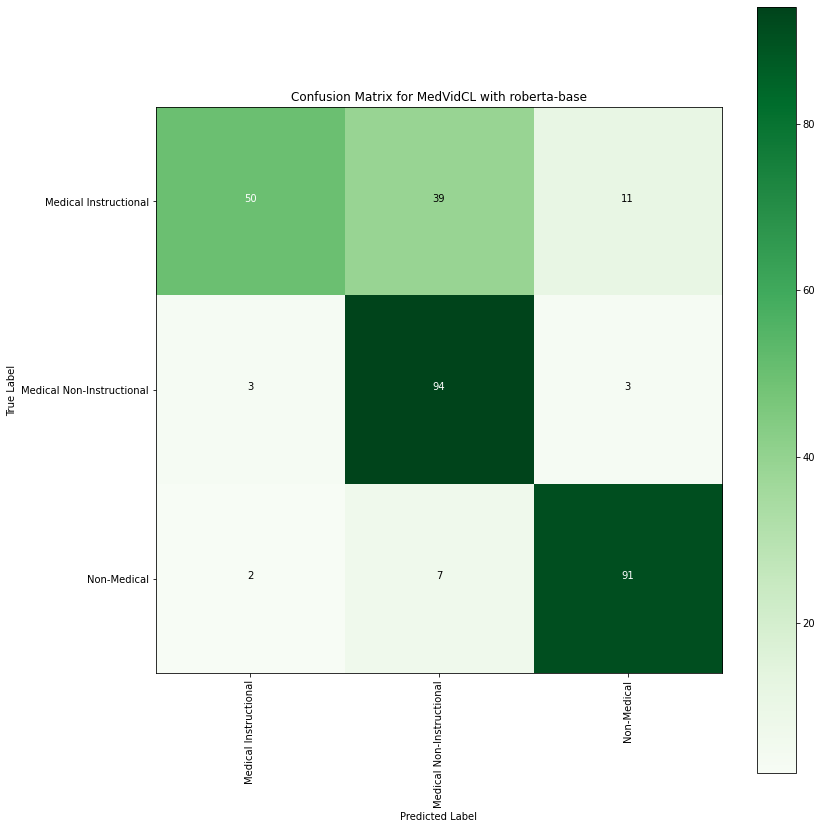

In [ ]:
# plot the confusion matrix
plt.figure(figsize = (12,12))
label = 'Confusion Matrix for MedVidCL with roberta-base'
multiclass_cm(cm, class_names, title=label)

In [ ]:
f1 = f1_score(y_test, y_val, average = "macro" )
print(f1)
accuracy_score(y_test, y_val)

0.7720998339015647


0.7833333333333333

In [ ]:
print(classification_report(y_test, y_val, target_names = class_names))

                           precision    recall  f1-score   support

    Medical Instructional       0.91      0.50      0.65       100
Medical Non-Instructional       0.67      0.94      0.78       100
              Non-Medical       0.87      0.91      0.89       100

                 accuracy                           0.78       300
                macro avg       0.82      0.78      0.77       300
             weighted avg       0.82      0.78      0.77       300



####5.2 roberta-base Transformer Model

In [ ]:
# Transformer Model
language_model='roberta-base'

In [ ]:
from ktrain import text
transform_model = text.Transformer(language_model, maxlen=l_max, classes = [0,1])

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:490: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  "The class_names argument is replacing the classes argument. Please update your code."


In [ ]:
# Converting split data to list [so it can processed]
#train
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

In [ ]:
#test
X_test = val_data['text'].tolist()
y_test = val_data['label'].tolist()

In [ ]:
# Pre-processing training & test data
train = transform_model.preprocess_train(X_train,y_train)
test = transform_model.preprocess_train(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 239
	95percentile : 1319
	99percentile : 2152


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:738: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 100
	95percentile : 676
	99percentile : 1304


Is Multi-Label? False


In [ ]:
# Model Classifier
model = transform_model.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch)

In [ ]:
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./roberta-base', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
learner.fit_onecycle(lr=lr,epochs=20, callbacks=[tbCallBack])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
703/703 [==============================] - 132s 187ms/step - loss: 0.1656 - accuracy: 0.9395 - val_loss: 0.4739 - val_accuracy: 0.8367
Epoch 2/20
703/703 [==============================] - 132s 186ms/step - loss: 0.1491 - accuracy: 0.9485 - val_loss: 0.5055 - val_accuracy: 0.8267
Epoch 3/20
703/703 [==============================] - 132s 186ms/step - loss: 0.1250 - accuracy: 0.9585 - val_loss: 0.4673 - val_accuracy: 0.8767
Epoch 4/20
703/703 [==============================] - 131s 186ms/step - loss: 0.1191 - accuracy: 0.9599 - val_loss: 0.5898 - val_accuracy: 0.7933
Epoch 5/20
703/703 [==============================] - 132s 186ms/step - loss: 0.0972 - accuracy: 0.9685 - val_loss: 0.5302 - val_accuracy: 0.8367
Epoch 6/20
703/703 [==============================] - 132s 186ms/step - loss: 0.0808 - accuracy: 0.9718 - val_loss: 0.7075 - val_accuracy: 0.8000
Epoch 7/20
703/703 [==============================] - 131s 18

In [ ]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

In [ ]:
!tensorboard dev upload --logdir ./roberta-base \
  --name "MedVidCL - /roberta-base" \
  --description "Training results from roberta-base on MedVidCL" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/d9IPbamORSyMGneu0o8qTw/

[2022-05-11T17:08:48] Started scanning logdir.
E0511 17:08:50.008261 140644611229568 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
[2022-05-11T17:08:50] Total uploaded: 138 scalars, 0 tensors, 1 binary objects (2.9 MB)
Total skipped: 1 binary objects (2.9 MB)
[2022-05-11T17:08:50] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/d9IPbamORSyMGneu0o8qTw/


In [ ]:
predictor = ktrain.get_predictor(learner.model, transform_model)

In [ ]:
test_data  = pd.json_normalize(vid_test)

In [ ]:
test_data['text']

0       How to manage heartburn & chest heaviness? - D...
1        How To Lower Estrogen Levels In Males Naturally 
2                                How to Treat Cellulitis 
3       How to Prevent Elbow Injuries in Youth Basebal...
4                        DIY Off The Shoulder Sweatshirt 
                              ...                        
1595    Taping to Prevent Shoulder Dislocation during ...
1596    Mares X Vision Liquid Skin Mask - www.simplysc...
1597    How to relieve sinus pressure and sinus pain w...
1598    Nadege & Paola Make Arugula Salad with grilled...
1599    How to Treat Gout Flares during the COVID-19 C...
Name: text, Length: 1600, dtype: object

In [ ]:
y_predict = predictor.predict(np.asarray(test_data['text']))

In [ ]:
print(y_predict)

['Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Medical Non-instructional', 'Non-medical', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Non-medic

In [ ]:
answer  = []
for i in range(len(test_data)):
  new = {"video_id":vid_test[i]["video_id"] , "label":y_predict[i]}
  answer.append(new)

In [ ]:
with open("predictions.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_val = predictor.predict(np.asarray(val_data['text']))

In [ ]:
print(len(val_data), len(y_predict))

300 1600


In [ ]:
answer  = []
for i in range(len(val_data)):
  new = {"video_id":vid_val[i]["video_id"] , "label":y_val[i]}
  answer.append(new)

In [ ]:
with open("solution.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_test = np.asarray(test_data["label"])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
y_test= np.asarray(val_data["label"])
cm = confusion_matrix(y_test, y_val)
print(cm)

[[60 32  8]
 [ 6 92  2]
 [ 5  9 86]]


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import itertools

In [ ]:
# Define function to display confusion matrix for multiclass classification problems
def multiclass_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
class_names = ['Medical Instructional',  'Medical Non-Instructional',  'Non-Medical']

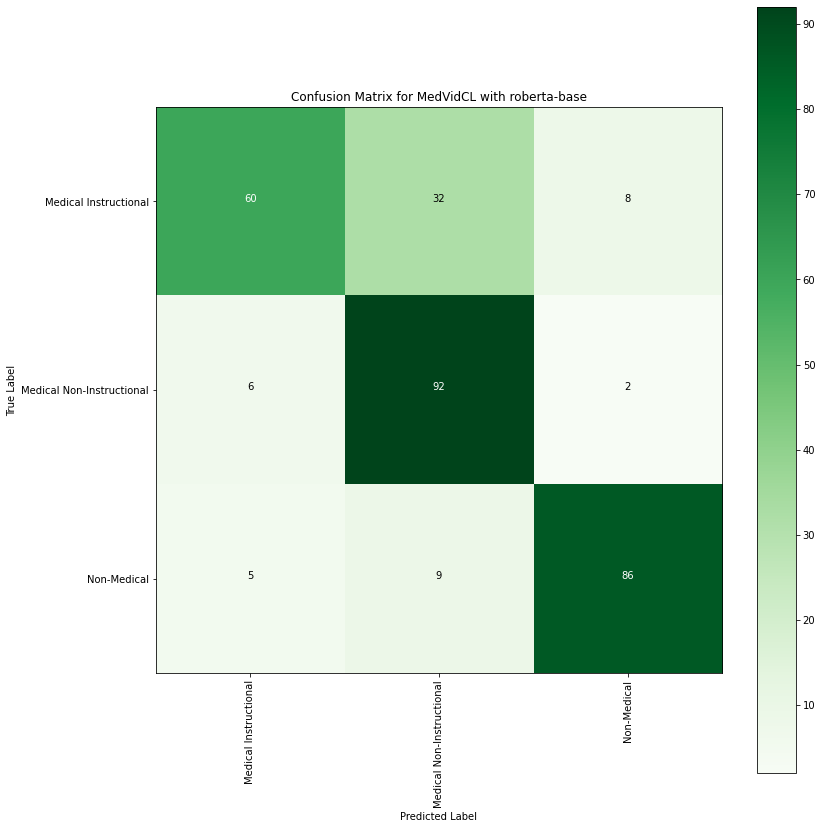

In [ ]:
# plot the confusion matrix
plt.figure(figsize = (12,12))
label = 'Confusion Matrix for MedVidCL with roberta-base'
multiclass_cm(cm, class_names, title=label)

In [ ]:
f1 = f1_score(y_test, y_val, average = "macro" )
print(f1)
accuracy_score(y_test, y_val)

0.7896683257295086


0.7933333333333333

In [ ]:
print(classification_report(y_test, y_val, target_names = class_names))

                           precision    recall  f1-score   support

    Medical Instructional       0.85      0.60      0.70       100
Medical Non-Instructional       0.69      0.92      0.79       100
              Non-Medical       0.90      0.86      0.88       100

                 accuracy                           0.79       300
                macro avg       0.81      0.79      0.79       300
             weighted avg       0.81      0.79      0.79       300



####5.3 Bio ClinicalBERT Transformer Model

In [ ]:
# Transformer Model
language_model='emilyalsentzer/Bio_ClinicalBERT'

In [ ]:
from ktrain import text
transform_model = text.Transformer(language_model, maxlen=l_max, classes = [0,1])

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:490: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  "The class_names argument is replacing the classes argument. Please update your code."


In [ ]:
# Converting split data to list [so it can processed]
#train
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

In [ ]:
#test
X_test = val_data['text'].tolist()
y_test = val_data['label'].tolist()

In [ ]:
# Pre-processing training & test data
train = transform_model.preprocess_train(X_train,y_train)
test = transform_model.preprocess_train(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 239
	95percentile : 1319
	99percentile : 2152


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:738: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 100
	95percentile : 676
	99percentile : 1304


Is Multi-Label? False


In [ ]:
# Model Classifier
model = transform_model.get_classifier()

404 Client Error: Not Found for url: https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT/resolve/main/tf_model.h5
/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:1172: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  "Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) "


In [ ]:
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch)

In [ ]:
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Bio_ClinicalBERT', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
learner.fit_onecycle(lr=lr,epochs=20, callbacks=[tbCallBack])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
703/703 [==============================] - 145s 184ms/step - loss: 0.7776 - accuracy: 0.6794 - val_loss: 0.6312 - val_accuracy: 0.7200
Epoch 2/20
703/703 [==============================] - 127s 180ms/step - loss: 0.3905 - accuracy: 0.8563 - val_loss: 0.5161 - val_accuracy: 0.7867
Epoch 3/20
703/703 [==============================] - 127s 180ms/step - loss: 0.2811 - accuracy: 0.8980 - val_loss: 0.5011 - val_accuracy: 0.8100
Epoch 4/20
703/703 [==============================] - 127s 180ms/step - loss: 0.1988 - accuracy: 0.9315 - val_loss: 0.6183 - val_accuracy: 0.7767
Epoch 5/20
703/703 [==============================] - 127s 180ms/step - loss: 0.1394 - accuracy: 0.9566 - val_loss: 0.7111 - val_accuracy: 0.8067
Epoch 6/20
703/703 [==============================] - 127s 180ms/step - loss: 0.1060 - accuracy: 0.9687 - val_loss: 0.5747 - val_accuracy: 0.8100
Epoch 7/20
703/703 [==============================] - 127s 18

In [ ]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

In [ ]:
!tensorboard dev upload --logdir ./Bio_ClinicalBERT \
  --name "MedVidCL - /Bio_ClinicalBERT" \
  --description "Training results from Bio_ClinicalBERT on MedVidCL" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/yKWjJ0e9TgatPt38anpgqA/

[2022-05-11T23:06:07] Started scanning logdir.
E0511 23:06:09.032360 140396819167104 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
[2022-05-11T23:06:09] Total uploaded: 240 scalars, 0 tensors, 1 binary objects (2.8 MB)
Total skipped: 1 binary objects (2.8 MB)
[2022-05-11T23:06:09] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/yKWjJ0e9TgatPt38anpgqA/


In [ ]:
predictor = ktrain.get_predictor(learner.model, transform_model)

In [ ]:
test_data  = pd.json_normalize(vid_test)

In [ ]:
test_data['text']

0       How to manage heartburn & chest heaviness? - D...
1        How To Lower Estrogen Levels In Males Naturally 
2                                How to Treat Cellulitis 
3       How to Prevent Elbow Injuries in Youth Basebal...
4                        DIY Off The Shoulder Sweatshirt 
                              ...                        
1595    Taping to Prevent Shoulder Dislocation during ...
1596    Mares X Vision Liquid Skin Mask - www.simplysc...
1597    How to relieve sinus pressure and sinus pain w...
1598    Nadege & Paola Make Arugula Salad with grilled...
1599    How to Treat Gout Flares during the COVID-19 C...
Name: text, Length: 1600, dtype: object

In [ ]:
y_predict = predictor.predict(np.asarray(test_data['text']))

In [ ]:
print(y_predict)

['Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Non-medical', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Non-medical', 'Medical Non-instructio

In [ ]:
answer  = []
for i in range(len(test_data)):
  new = {"video_id":vid_test[i]["video_id"] , "label":y_predict[i]}
  answer.append(new)

In [ ]:
with open("predictions.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_val = predictor.predict(np.asarray(val_data['text']))

In [ ]:
print(len(val_data), len(y_predict))

300 1600


In [ ]:
answer  = []
for i in range(len(val_data)):
  new = {"video_id":vid_val[i]["video_id"] , "label":y_val[i]}
  answer.append(new)

In [ ]:
with open("solution.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_test = np.asarray(test_data["label"])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
y_test= np.asarray(val_data["label"])
cm = confusion_matrix(y_test, y_val)
print(cm)

[[55 36  9]
 [ 4 95  1]
 [ 6  5 89]]


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import itertools

In [ ]:
# Define function to display confusion matrix for multiclass classification problems
def multiclass_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
class_names = ['Medical Instructional',  'Medical Non-Instructional',  'Non-Medical']

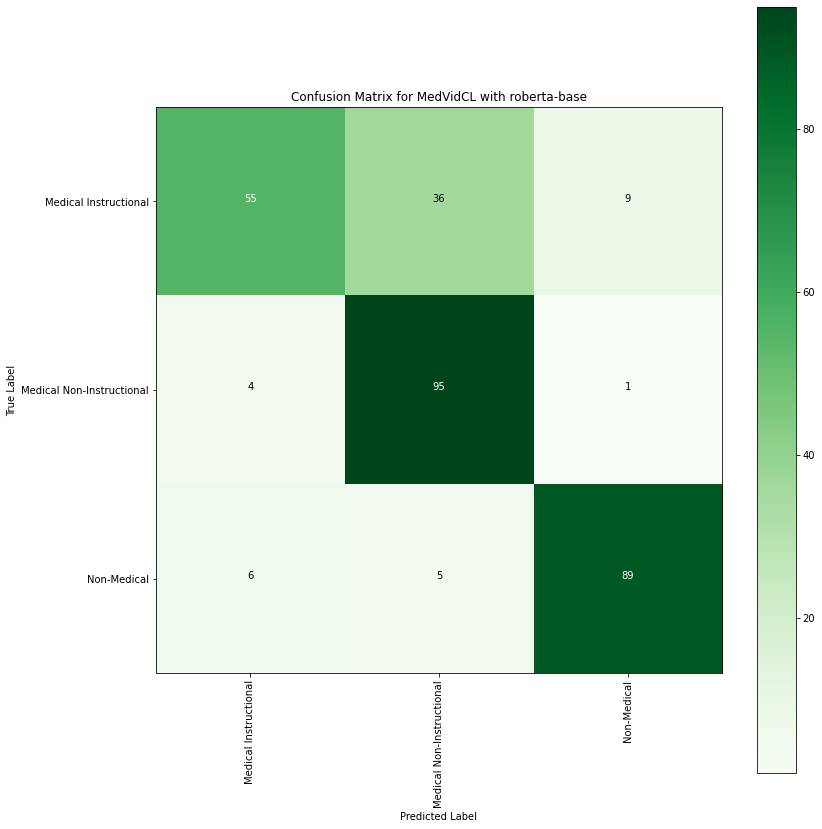

In [ ]:
# plot the confusion matrix
plt.figure(figsize = (12,12))
label = 'Confusion Matrix for MedVidCL with roberta-base'
multiclass_cm(cm, class_names, title=label)

In [ ]:
f1 = f1_score(y_test, y_val, average = "macro" )
print(f1)
accuracy_score(y_test, y_val)

0.7887412580794746


0.7966666666666666

In [ ]:
print(classification_report(y_test, y_val, target_names = class_names))

                           precision    recall  f1-score   support

    Medical Instructional       0.85      0.55      0.67       100
Medical Non-Instructional       0.70      0.95      0.81       100
              Non-Medical       0.90      0.89      0.89       100

                 accuracy                           0.80       300
                macro avg       0.81      0.80      0.79       300
             weighted avg       0.81      0.80      0.79       300



####5.4 BERT-base-uncased Transformer Model

In [ ]:
# Transformer Model
language_model='bert-base-uncased'

In [ ]:
from ktrain import text
transform_model = text.Transformer(language_model, maxlen=l_max, classes = [0,1])

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:490: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  "The class_names argument is replacing the classes argument. Please update your code."


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Converting split data to list [so it can processed]
#train
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

In [ ]:
#test
X_test = val_data['text'].tolist()
y_test = val_data['label'].tolist()

In [ ]:
# Pre-processing training & test data
train = transform_model.preprocess_train(X_train,y_train)
test = transform_model.preprocess_train(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 239
	95percentile : 1319
	99percentile : 2152


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:738: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 100
	95percentile : 676
	99percentile : 1304


Is Multi-Label? False


In [ ]:
# Model Classifier
model = transform_model.get_classifier()

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch)

In [ ]:
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./bert-base-uncased', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
learner.fit_onecycle(lr=lr,epochs=20, callbacks=[tbCallBack])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
703/703 [==============================] - 145s 184ms/step - loss: 0.6547 - accuracy: 0.7565 - val_loss: 0.5329 - val_accuracy: 0.7700
Epoch 2/20
703/703 [==============================] - 127s 180ms/step - loss: 0.3516 - accuracy: 0.8736 - val_loss: 0.3629 - val_accuracy: 0.8267
Epoch 3/20
703/703 [==============================] - 127s 180ms/step - loss: 0.2633 - accuracy: 0.9089 - val_loss: 0.3417 - val_accuracy: 0.8767
Epoch 4/20
703/703 [==============================] - 127s 180ms/step - loss: 0.1952 - accuracy: 0.9348 - val_loss: 0.4313 - val_accuracy: 0.8367
Epoch 5/20
703/703 [==============================] - 127s 180ms/step - loss: 0.1422 - accuracy: 0.9568 - val_loss: 0.5952 - val_accuracy: 0.8033
Epoch 6/20
703/703 [==============================] - 127s 180ms/step - loss: 0.0997 - accuracy: 0.9675 - val_loss: 0.8129 - val_accuracy: 0.7800
Epoch 7/20
703/703 [==============================] - 127s 18

In [ ]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

In [ ]:
!tensorboard dev upload --logdir ./bert-base-uncased \
  --name "MedVidCL - /bert-base-uncased" \
  --description "Training results from bert-base-uncased on MedVidCL" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/4bNJ1Zb4T7G3EKpyP8FKog/

[2022-05-11T19:19:35] Started scanning logdir.
[2022-05-11T19:19:36] Total uploaded: 120 scalars, 0 tensors, 1 binary objects (2.8 MB)
[2022-05-11T19:19:36] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/4bNJ1Zb4T7G3EKpyP8FKog/


In [ ]:
predictor = ktrain.get_predictor(learner.model, transform_model)

In [ ]:
test_data  = pd.json_normalize(vid_test)

In [ ]:
test_data['text']

0       How to manage heartburn & chest heaviness? - D...
1        How To Lower Estrogen Levels In Males Naturally 
2                                How to Treat Cellulitis 
3       How to Prevent Elbow Injuries in Youth Basebal...
4                        DIY Off The Shoulder Sweatshirt 
                              ...                        
1595    Taping to Prevent Shoulder Dislocation during ...
1596    Mares X Vision Liquid Skin Mask - www.simplysc...
1597    How to relieve sinus pressure and sinus pain w...
1598    Nadege & Paola Make Arugula Salad with grilled...
1599    How to Treat Gout Flares during the COVID-19 C...
Name: text, Length: 1600, dtype: object

In [ ]:
y_predict = predictor.predict(np.asarray(test_data['text']))

In [ ]:
print(y_predict)

['Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Medical Instructional', 'Non-medical', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Non-medic

In [ ]:
answer  = []
for i in range(len(test_data)):
  new = {"video_id":vid_test[i]["video_id"] , "label":y_predict[i]}
  answer.append(new)

In [ ]:
with open("predictions.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_val = predictor.predict(np.asarray(val_data['text']))

In [ ]:
print(len(val_data), len(y_predict))

300 1600


In [ ]:
answer  = []
for i in range(len(val_data)):
  new = {"video_id":vid_val[i]["video_id"] , "label":y_val[i]}
  answer.append(new)

In [ ]:
with open("solution.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_test = np.asarray(test_data["label"])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
y_test= np.asarray(val_data["label"])
cm = confusion_matrix(y_test, y_val)
print(cm)

[[57 37  6]
 [ 3 95  2]
 [ 3  5 92]]


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import itertools

In [ ]:
# Define function to display confusion matrix for multiclass classification problems
def multiclass_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
class_names = ['Medical Instructional',  'Medical Non-Instructional',  'Non-Medical']

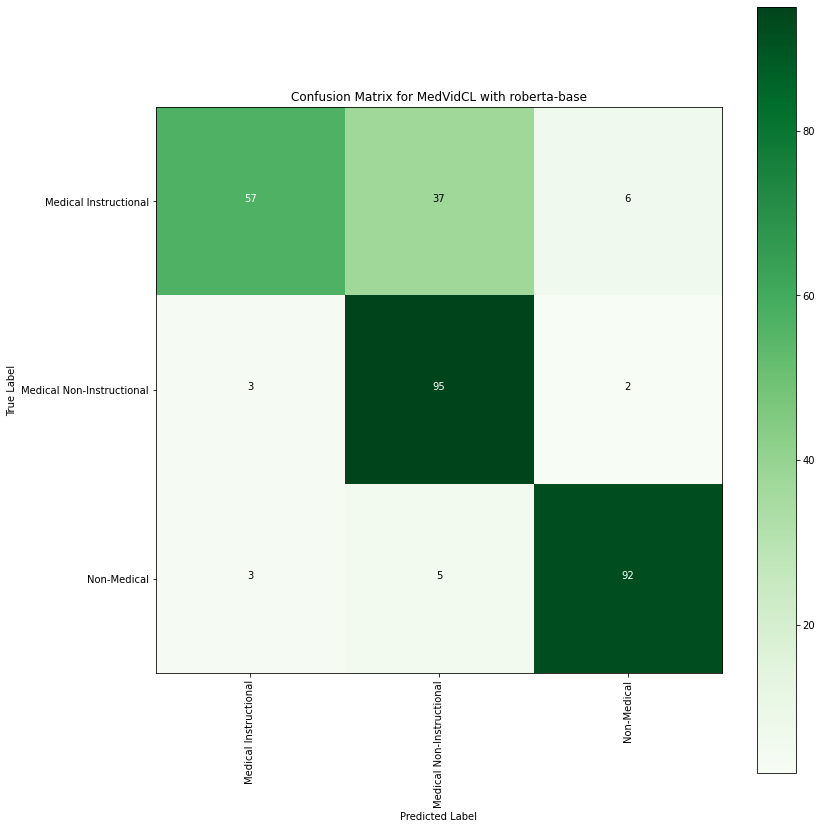

In [ ]:
# plot the confusion matrix
plt.figure(figsize = (12,12))
label = 'Confusion Matrix for MedVidCL with roberta-base'
multiclass_cm(cm, class_names, title=label)

In [ ]:
f1 = f1_score(y_test, y_val, average = "macro" )
print(f1)
accuracy_score(y_test, y_val)

0.8070247555935216


0.8133333333333334

In [ ]:
print(classification_report(y_test, y_val, target_names = class_names))

                           precision    recall  f1-score   support

    Medical Instructional       0.90      0.57      0.70       100
Medical Non-Instructional       0.69      0.95      0.80       100
              Non-Medical       0.92      0.92      0.92       100

                 accuracy                           0.81       300
                macro avg       0.84      0.81      0.81       300
             weighted avg       0.84      0.81      0.81       300



####5.5 BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext Transformer Model

In [ ]:
# Transformer Model
language_model='microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext'

In [ ]:
from ktrain import text
transform_model = text.Transformer(language_model, maxlen=l_max, classes = [0,1])

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:490: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  "The class_names argument is replacing the classes argument. Please update your code."


In [ ]:
# Converting split data to list [so it can processed]
#train
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

In [ ]:
#test
X_test = val_data['text'].tolist()
y_test = val_data['label'].tolist()

In [ ]:
# Pre-processing training & test data
train = transform_model.preprocess_train(X_train,y_train)
test = transform_model.preprocess_train(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 239
	95percentile : 1319
	99percentile : 2152


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:738: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 100
	95percentile : 676
	99percentile : 1304


Is Multi-Label? False


In [ ]:
# Model Classifier
model = transform_model.get_classifier()

404 Client Error: Not Found for url: https://huggingface.co/microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext/resolve/main/tf_model.h5
/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:1172: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  "Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) "


In [ ]:
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch)

In [ ]:
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./BiomedNLP-PubMedBERT', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
learner.fit_onecycle(lr=lr,epochs=20, callbacks=[tbCallBack])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
703/703 [==============================] - 144s 184ms/step - loss: 0.6435 - accuracy: 0.7337 - val_loss: 0.5382 - val_accuracy: 0.7700
Epoch 2/20
703/703 [==============================] - 127s 180ms/step - loss: 0.3494 - accuracy: 0.8734 - val_loss: 0.5342 - val_accuracy: 0.7600
Epoch 3/20
703/703 [==============================] - 127s 180ms/step - loss: 0.2918 - accuracy: 0.8890 - val_loss: 0.4866 - val_accuracy: 0.8067
Epoch 4/20
703/703 [==============================] - 127s 180ms/step - loss: 0.2328 - accuracy: 0.9184 - val_loss: 0.4701 - val_accuracy: 0.8267
Epoch 5/20
703/703 [==============================] - 127s 180ms/step - loss: 0.2025 - accuracy: 0.9277 - val_loss: 0.4619 - val_accuracy: 0.8333
Epoch 6/20
703/703 [==============================] - 127s 180ms/step - loss: 0.1511 - accuracy: 0.9483 - val_loss: 0.4621 - val_accuracy: 0.8600
Epoch 7/20
703/703 [==============================] - 127s 18

In [ ]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

In [ ]:
!tensorboard dev upload --logdir ./bigbird-roberta-base \
  --name "MedVidCL - /BiomedNLP-PubMedBERT" \
  --description "Training results from BiomedNLP-PubMedBERT on MedVidCL" \
  --one_shot

./bigbird-roberta-base: No such directory.
User specified `one_shot` mode with an unavailable logdir. Exiting without creating an experiment.


In [ ]:
predictor = ktrain.get_predictor(learner.model, transform_model)

In [ ]:
test_data  = pd.json_normalize(vid_test)

In [ ]:
test_data['text']

0       How to manage heartburn & chest heaviness? - D...
1        How To Lower Estrogen Levels In Males Naturally 
2                                How to Treat Cellulitis 
3       How to Prevent Elbow Injuries in Youth Basebal...
4                        DIY Off The Shoulder Sweatshirt 
                              ...                        
1595    Taping to Prevent Shoulder Dislocation during ...
1596    Mares X Vision Liquid Skin Mask - www.simplysc...
1597    How to relieve sinus pressure and sinus pain w...
1598    Nadege & Paola Make Arugula Salad with grilled...
1599    How to Treat Gout Flares during the COVID-19 C...
Name: text, Length: 1600, dtype: object

In [ ]:
y_predict = predictor.predict(np.asarray(test_data['text']))

In [ ]:
print(y_predict)

['Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 

In [ ]:
answer  = []
for i in range(len(test_data)):
  new = {"video_id":vid_test[i]["video_id"] , "label":y_predict[i]}
  answer.append(new)

In [ ]:
with open("predictions.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_val = predictor.predict(np.asarray(val_data['text']))

In [ ]:
print(len(val_data), len(y_predict))

300 1600


In [ ]:
answer  = []
for i in range(len(val_data)):
  new = {"video_id":vid_val[i]["video_id"] , "label":y_val[i]}
  answer.append(new)

In [ ]:
with open("solution.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_test = np.asarray(test_data["label"])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
y_test= np.asarray(val_data["label"])
cm = confusion_matrix(y_test, y_val)
print(cm)

[[59 36  5]
 [ 0 98  2]
 [ 4  2 94]]


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import itertools

In [ ]:
# Define function to display confusion matrix for multiclass classification problems
def multiclass_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
class_names = ['Medical Instructional',  'Medical Non-Instructional',  'Non-Medical']

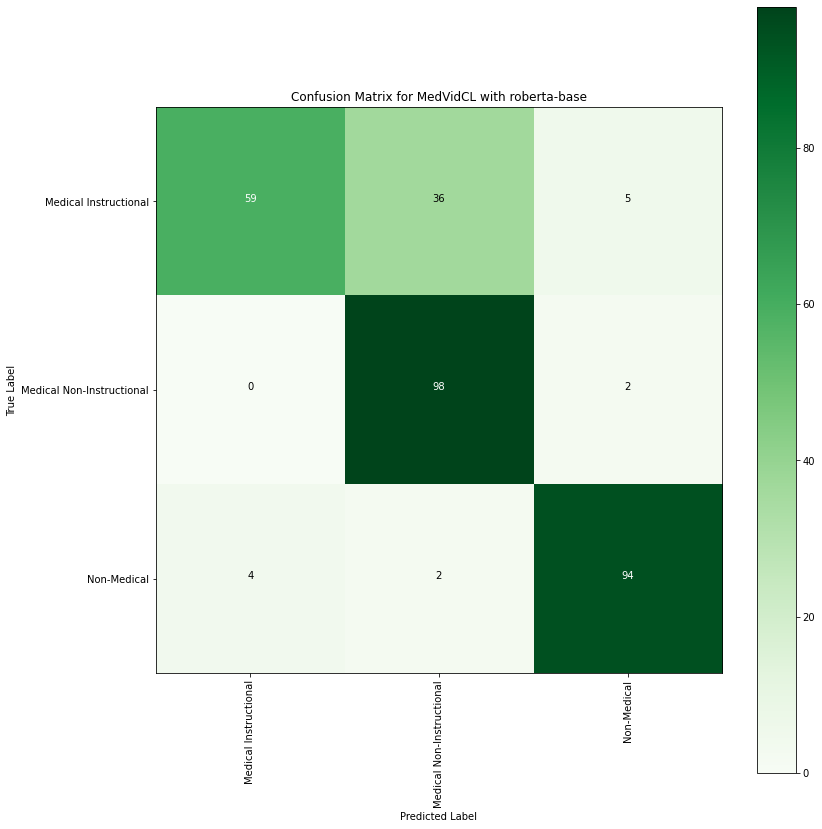

In [ ]:
# plot the confusion matrix
plt.figure(figsize = (12,12))
label = 'Confusion Matrix for MedVidCL with roberta-base'
multiclass_cm(cm, class_names, title=label)

In [ ]:
f1 = f1_score(y_test, y_val, average = "macro" )
print(f1)
accuracy_score(y_test, y_val)

0.8299194126763155


0.8366666666666667

In [ ]:
print(classification_report(y_test, y_val, target_names = class_names))

                           precision    recall  f1-score   support

    Medical Instructional       0.94      0.59      0.72       100
Medical Non-Instructional       0.72      0.98      0.83       100
              Non-Medical       0.93      0.94      0.94       100

                 accuracy                           0.84       300
                macro avg       0.86      0.84      0.83       300
             weighted avg       0.86      0.84      0.83       300



####5.6 Bio_Discharge_Summary_BERT Transformer Model

In [ ]:
# Transformer Model
language_model='emilyalsentzer/Bio_Discharge_Summary_BERT'

In [ ]:
from ktrain import text
transform_model = text.Transformer(language_model, maxlen=l_max, classes = [0,1])

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:490: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  "The class_names argument is replacing the classes argument. Please update your code."


Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

In [ ]:
# Converting split data to list [so it can processed]
#train
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

In [ ]:
#test
X_test = val_data['text'].tolist()
y_test = val_data['label'].tolist()

In [ ]:
# Pre-processing training & test data
train = transform_model.preprocess_train(X_train,y_train)
test = transform_model.preprocess_train(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 239
	95percentile : 1319
	99percentile : 2152


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:738: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 100
	95percentile : 676
	99percentile : 1304


Is Multi-Label? False


In [ ]:
# Model Classifier
model = transform_model.get_classifier()

404 Client Error: Not Found for url: https://huggingface.co/emilyalsentzer/Bio_Discharge_Summary_BERT/resolve/main/tf_model.h5
/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:1172: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  "Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) "


Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch)

In [ ]:
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Bio_Discharge_Summary_BERT', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
learner.fit_onecycle(lr=lr,epochs=20, callbacks=[tbCallBack])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
703/703 [==============================] - 144s 183ms/step - loss: 0.8196 - accuracy: 0.6495 - val_loss: 0.7040 - val_accuracy: 0.7133
Epoch 2/20
703/703 [==============================] - 127s 180ms/step - loss: 0.3820 - accuracy: 0.8646 - val_loss: 0.4706 - val_accuracy: 0.8167
Epoch 3/20
703/703 [==============================] - 127s 180ms/step - loss: 0.2669 - accuracy: 0.9075 - val_loss: 0.5357 - val_accuracy: 0.7933
Epoch 4/20
703/703 [==============================] - 127s 179ms/step - loss: 0.1971 - accuracy: 0.9348 - val_loss: 0.7093 - val_accuracy: 0.7800
Epoch 5/20
703/703 [==============================] - 127s 180ms/step - loss: 0.1297 - accuracy: 0.9592 - val_loss: 0.6908 - val_accuracy: 0.7767
Epoch 6/20
703/703 [==============================] - 127s 179ms/step - loss: 0.0934 - accuracy: 0.9706 - val_loss: 0.7095 - val_accuracy: 0.8133
Epoch 7/20
703/703 [==============================] - 127s 18

In [ ]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

In [ ]:
!tensorboard dev upload --logdir ./Bio_Discharge_Summary_BERT \
  --name "MedVidCL - /Bio_Discharge_Summary_BERT" \
  --description "Training results from Bio_Discharge_Summary_BERT on MedVidCL" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/SZRhd4xATeGyyzW2TAqgTA/

[2022-05-11T21:42:55] Started scanning logdir.
[2022-05-11T21:42:56] Total uploaded: 120 scalars, 0 tensors, 1 binary objects (2.8 MB)
[2022-05-11T21:42:56] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/SZRhd4xATeGyyzW2TAqgTA/


In [ ]:
predictor = ktrain.get_predictor(learner.model, transform_model)

In [ ]:
test_data  = pd.json_normalize(vid_test)

In [ ]:
test_data['text']

0       How to manage heartburn & chest heaviness? - D...
1        How To Lower Estrogen Levels In Males Naturally 
2                                How to Treat Cellulitis 
3       How to Prevent Elbow Injuries in Youth Basebal...
4                        DIY Off The Shoulder Sweatshirt 
                              ...                        
1595    Taping to Prevent Shoulder Dislocation during ...
1596    Mares X Vision Liquid Skin Mask - www.simplysc...
1597    How to relieve sinus pressure and sinus pain w...
1598    Nadege & Paola Make Arugula Salad with grilled...
1599    How to Treat Gout Flares during the COVID-19 C...
Name: text, Length: 1600, dtype: object

In [ ]:
y_predict = predictor.predict(np.asarray(test_data['text']))

In [ ]:
print(y_predict)

['Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Non-medical',

In [ ]:
answer  = []
for i in range(len(test_data)):
  new = {"video_id":vid_test[i]["video_id"] , "label":y_predict[i]}
  answer.append(new)

In [ ]:
with open("predictions.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_val = predictor.predict(np.asarray(val_data['text']))

In [ ]:
print(len(val_data), len(y_predict))

300 1600


In [ ]:
answer  = []
for i in range(len(val_data)):
  new = {"video_id":vid_val[i]["video_id"] , "label":y_val[i]}
  answer.append(new)

In [ ]:
with open("solution.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_test = np.asarray(test_data["label"])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
y_test= np.asarray(val_data["label"])
cm = confusion_matrix(y_test, y_val)
print(cm)

[[58 34  8]
 [ 4 94  2]
 [ 4  6 90]]


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import itertools

In [ ]:
# Define function to display confusion matrix for multiclass classification problems
def multiclass_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
class_names = ['Medical Instructional',  'Medical Non-Instructional',  'Non-Medical']

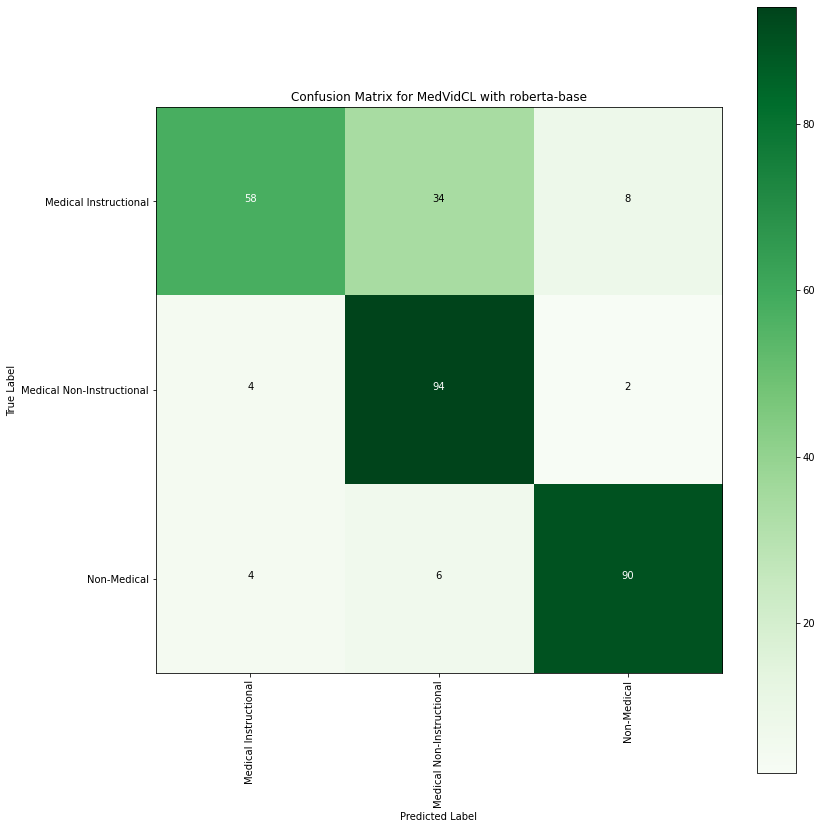

In [ ]:
# plot the confusion matrix
plt.figure(figsize = (12,12))
label = 'Confusion Matrix for MedVidCL with roberta-base'
multiclass_cm(cm, class_names, title=label)

In [ ]:
f1 = f1_score(y_test, y_val, average = "macro" )
print(f1)
accuracy_score(y_test, y_val)

0.8007379947138983


0.8066666666666666

In [ ]:
print(classification_report(y_test, y_val, target_names = class_names))

                           precision    recall  f1-score   support

    Medical Instructional       0.88      0.58      0.70       100
Medical Non-Instructional       0.70      0.94      0.80       100
              Non-Medical       0.90      0.90      0.90       100

                 accuracy                           0.81       300
                macro avg       0.83      0.81      0.80       300
             weighted avg       0.83      0.81      0.80       300



In [ ]:
!zip -r /content/save.zip /content

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2022.01.07/ (stored 0%)
  adding: content/.config/logs/2022.01.07/14.33.41.864886.log (deflated 54%)
  adding: content/.config/logs/2022.01.07/14.33.42.565580.log (deflated 53%)
  adding: content/.config/logs/2022.01.07/14.32.37.114755.log (deflated 91%)
  adding: content/.config/logs/2022.01.07/14.32.57.118850.log (deflated 53%)
  adding: content/.config/logs/2022.01.07/14.33.22.232212.log (deflated 54%)
  adding: content/.config/logs/2022.01.07/14.33.15.504888.log (deflated 86%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.con

In [ ]:
from google.colab import files
files.download("/content/save.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
solution_file = open('/content/solution.json')
solution = json.load(solution_file)

In [ ]:
sol_data = pd.json_normalize(solution)

In [ ]:
sol_data['label'][sol_data['label']=='Medical Instructional']

5      Medical Instructional
17     Medical Instructional
18     Medical Instructional
34     Medical Instructional
35     Medical Instructional
               ...          
279    Medical Instructional
281    Medical Instructional
287    Medical Instructional
289    Medical Instructional
291    Medical Instructional
Name: label, Length: 65, dtype: object

####5.7 BioBERT

In [ ]:
# Transformer Model
language_model='dmis-lab/biobert-v1.1'

In [ ]:
from ktrain import text
transform_model = text.Transformer(language_model, maxlen=l_max, classes = [0,1])

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:490: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  "The class_names argument is replacing the classes argument. Please update your code."


Downloading:   0%|          | 0.00/462 [00:00<?, ?B/s]

In [ ]:
# Converting split data to list [so it can processed]
#train
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

In [ ]:
#test
X_test = val_data['text'].tolist()
y_test = val_data['label'].tolist()

In [ ]:
# Pre-processing training & test data
train = transform_model.preprocess_train(X_train,y_train)
test = transform_model.preprocess_train(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 239
	95percentile : 1319
	99percentile : 2152


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:738: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 100
	95percentile : 676
	99percentile : 1304


Is Multi-Label? False


In [ ]:
# Model Classifier
model = transform_model.get_classifier()

404 Client Error: Not Found for url: https://huggingface.co/dmis-lab/biobert-v1.1/resolve/main/tf_model.h5
/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:1172: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  "Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) "


Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=batch)

In [ ]:
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./biobert', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
learner.fit_onecycle(lr=lr,epochs=20, callbacks=[tbCallBack])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
703/703 [==============================] - 144s 179ms/step - loss: 0.7750 - accuracy: 0.6469 - val_loss: 0.7377 - val_accuracy: 0.6667
Epoch 2/20
703/703 [==============================] - 127s 179ms/step - loss: 0.3604 - accuracy: 0.8684 - val_loss: 0.4251 - val_accuracy: 0.8500
Epoch 3/20
703/703 [==============================] - 127s 179ms/step - loss: 0.2727 - accuracy: 0.9030 - val_loss: 0.4399 - val_accuracy: 0.8533
Epoch 4/20
703/703 [==============================] - 127s 179ms/step - loss: 0.2050 - accuracy: 0.9293 - val_loss: 0.5245 - val_accuracy: 0.8333
Epoch 5/20
703/703 [==============================] - 127s 179ms/step - loss: 0.1400 - accuracy: 0.9516 - val_loss: 0.5358 - val_accuracy: 0.8267
Epoch 6/20
703/703 [==============================] - 127s 179ms/step - loss: 0.1059 - accuracy: 0.9647 - val_loss: 0.5816 - val_accuracy: 0.8300
Epoch 7/20
703/703 [==============================] - 127s 17

In [ ]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

In [ ]:
!tensorboard dev upload --logdir ./biobert\
  --name "MedVidCL - /biobert" \
  --description "Training results from biobert on MedVidCL" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/4tObNo92TlOSqc2E6Wrjbw/

[2022-05-15T12:45:30] Started scanning logdir.
[2022-05-15T12:45:31] Total uploaded: 120 scalars, 0 tensors, 1 binary objects (2.8 MB)
[2022-05-15T12:45:31] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/4tObNo92TlOSqc2E6Wrjbw/


In [ ]:
predictor = ktrain.get_predictor(learner.model, transform_model)

In [ ]:
test_data  = pd.json_normalize(vid_test)

In [ ]:
test_data['text']

0       How to manage heartburn & chest heaviness? - D...
1        How To Lower Estrogen Levels In Males Naturally 
2                                How to Treat Cellulitis 
3       How to Prevent Elbow Injuries in Youth Basebal...
4                        DIY Off The Shoulder Sweatshirt 
                              ...                        
1595    Taping to Prevent Shoulder Dislocation during ...
1596    Mares X Vision Liquid Skin Mask - www.simplysc...
1597    How to relieve sinus pressure and sinus pain w...
1598    Nadege & Paola Make Arugula Salad with grilled...
1599    How to Treat Gout Flares during the COVID-19 C...
Name: text, Length: 1600, dtype: object

In [ ]:
y_predict = predictor.predict(np.asarray(test_data['text']))

In [ ]:
print(y_predict)

['Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Non-medical', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Non-instructional', 'Medical Instructional', 'Non-medical', 'Non-medical', 'Medical Non-instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Instructional', 'Medical Non-instructional', 'Non-med

In [ ]:
answer  = []
for i in range(len(test_data)):
  new = {"video_id":vid_test[i]["video_id"] , "label":y_predict[i]}
  answer.append(new)

In [ ]:
with open("predictions.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_val = predictor.predict(np.asarray(val_data['text']))

In [ ]:
print(len(val_data), len(y_predict))

300 1600


In [ ]:
answer  = []
for i in range(len(val_data)):
  new = {"video_id":vid_val[i]["video_id"] , "label":y_val[i]}
  answer.append(new)

In [ ]:
with open("solution.json", "w") as final:
  json.dump(answer, final)

In [ ]:
y_test = np.asarray(test_data["label"])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
y_test= np.asarray(val_data["label"])
cm = confusion_matrix(y_test, y_val)
print(cm)

[[61 34  5]
 [ 2 96  2]
 [ 6 10 84]]


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import itertools

In [ ]:
# Define function to display confusion matrix for multiclass classification problems
# For late, could have optimize the implementation with better general purpose functions - for later
def multiclass_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
class_names = ['Medical Instructional',  'Medical Non-Instructional',  'Non-Medical']

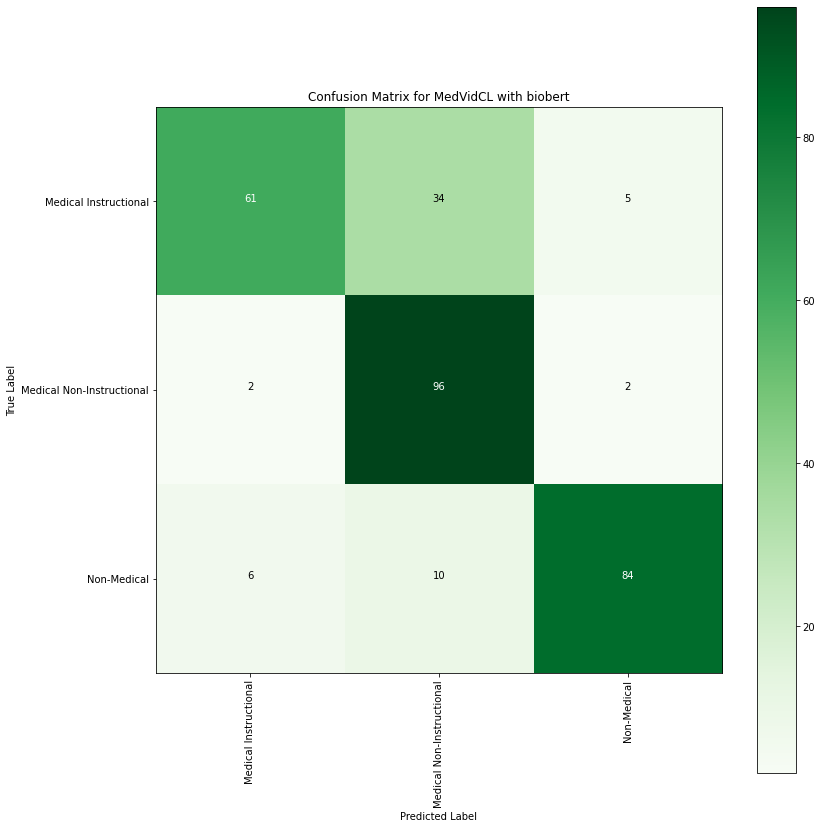

In [ ]:
# plot the confusion matrix
plt.figure(figsize = (12,12))
label = 'Confusion Matrix for MedVidCL with biobert'
multiclass_cm(cm, class_names, title=label)

In [ ]:
f1 = f1_score(y_test, y_val, average = "macro" )
print(f1)
accuracy_score(y_test, y_val)

0.8004915476522404


0.8033333333333333

In [ ]:
print(classification_report(y_test, y_val, target_names = class_names))

                           precision    recall  f1-score   support

    Medical Instructional       0.88      0.61      0.72       100
Medical Non-Instructional       0.69      0.96      0.80       100
              Non-Medical       0.92      0.84      0.88       100

                 accuracy                           0.80       300
                macro avg       0.83      0.80      0.80       300
             weighted avg       0.83      0.80      0.80       300



###6 Solutions & Use

Medical Instructional


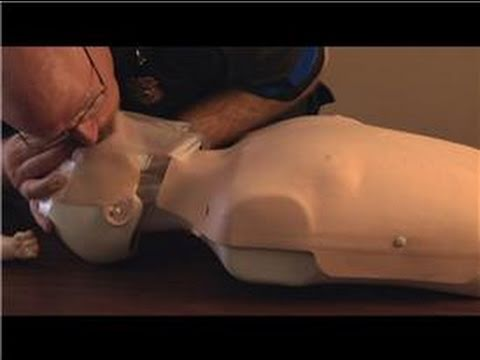

In [ ]:
print(sol_data['label'][281])
from IPython.display import YouTubeVideo
YouTubeVideo(sol_data['video_id'][281])

Medical Instructional


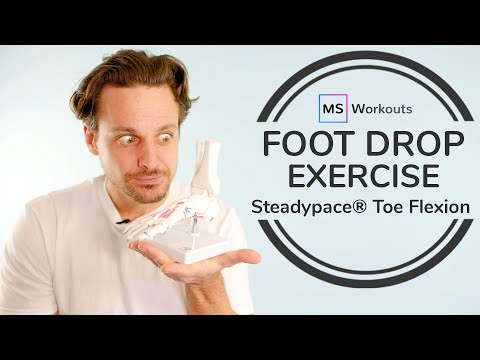

In [ ]:
print(sol_data['label'][18])
YouTubeVideo(sol_data['video_id'][18])

Medical Instructional


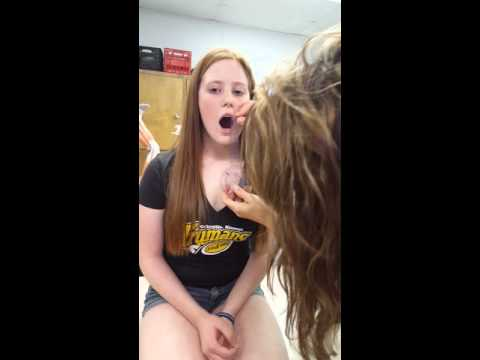

In [ ]:
print(sol_data['label'][18])
YouTubeVideo(sol_data['video_id'][5])

Non-medical


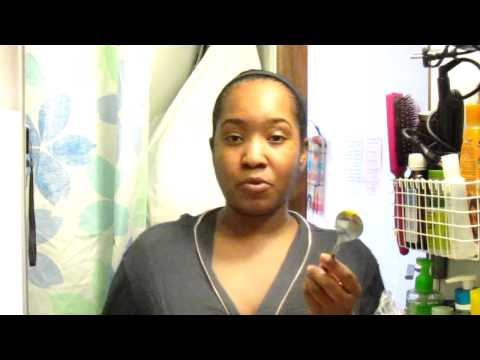

In [ ]:
print(sol_data['label'][1])
YouTubeVideo(sol_data['video_id'][1])

Medical Instructional


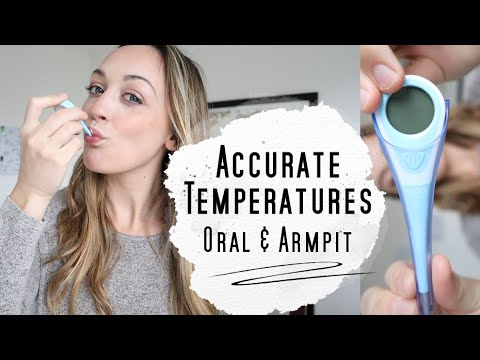

In [ ]:
print(sol_data['label'][93])
YouTubeVideo(sol_data['video_id'][93])

Non-medical


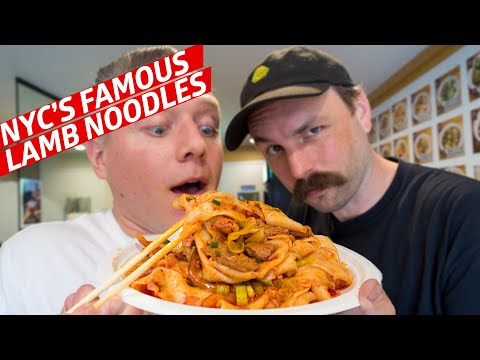

In [ ]:
print(sol_data['label'][122])
YouTubeVideo(sol_data['video_id'][122])

###7. Redefining the World of Search & Tiktok like QA Experience for domain specific multi-modal content

**Wireframe Models**

<p align = 'justify'>The development of a sophisticated application for medical instructional videos question and answering was out of the scope of this project. The purpose of this project was to run the baselines for the BioNLP 2022 tasks and thereby improve the baselines for the medical instructional video classification tasks. However, in terms of future work, a set of high-fidelity wireframes were developed to illustrate the potential of this work in terms of its ability to redefine search and content consumption for domain-specific knowledge, specifically within healthcare as in this case. This work will inform future
research and sophisticated real-life applications in the domain of multimodal knowledge representations within the healthcare domain, and its utility for developing sophisticated question answering applications.</p>

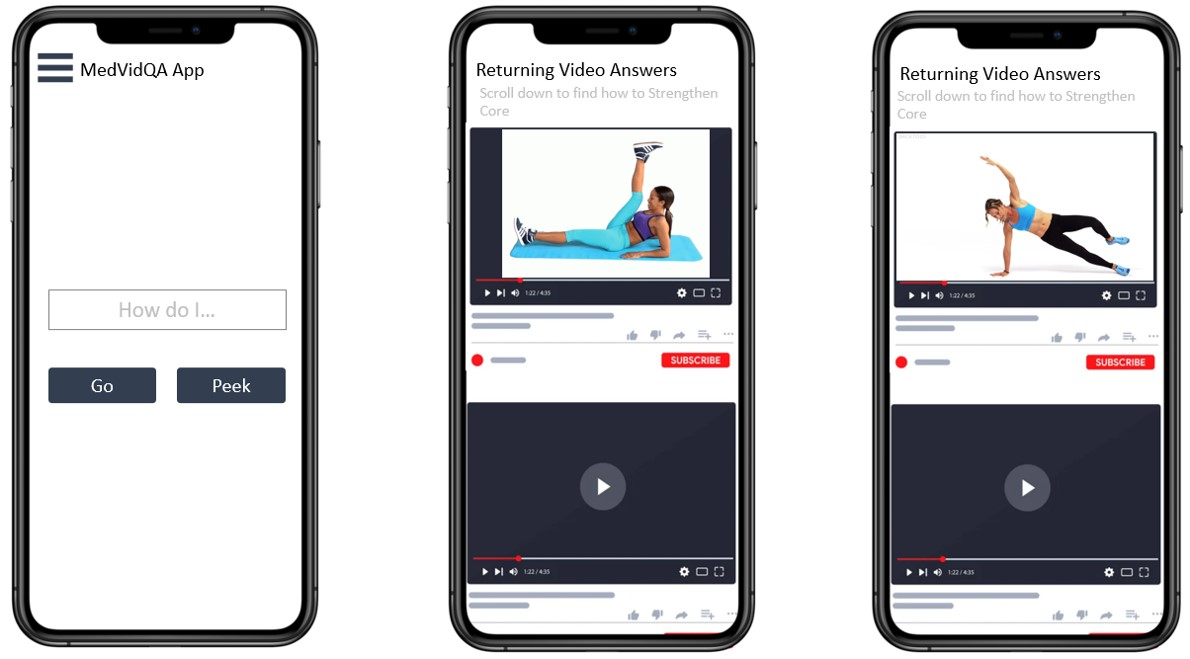

In [ ]:
from IPython.display import Image, display
display(Image('/content/wireframe.jpg'))